# Logistic Regresison with Gradient Descent

[Kevin McGuinness](http://www.eeng.dcu.ie/~mcguinne/), School of Electronic Engineering, Dublin City University

---

This notebook illustrates how to implement logistic regression (i.e. the binary classification algorithm) using gradient descent.

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import seaborn as sns
sns.set_style('white')

## 1. Generate some data


Generate synthetic data. `y` is generated by flipping a fair coin. `X` is generated from a mixture of Gaussians with fixed cluster centers.


In [ ]:
np.random.seed(42)

In [ ]:
def generate_data(n=100):
    # y generated using fair coin flip
    y = (np.random.rand(n) > 0.5).astype(np.int8)
    
    # x location is cluster center + gaussian noise
    centers = np.array([[1, 5], [5, 1]])
    X = centers[y] + np.random.randn(n,2) * 0.8
    
    return X, y

In [ ]:
X, y = generate_data()

Text(0,0.5,'$x_2$')

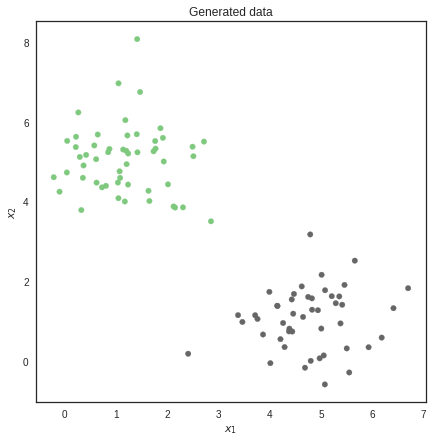

In [ ]:
figure(figsize=(7,7))
scatter(X[:,0], X[:,1], c=y, cmap=cm.Accent, s=30)
title('Generated data')
xlabel('$x_1$')
ylabel('$x_2$')

## 2. Define the model, loss, and gradient

The model is a sigmoid of a linear function:

$$
f(x, w, b) = \frac{1}{1 + e^{-(w^T x + b)}}
$$

We use the cross entropy loss:

$$
L = \frac{1}{N} \sum_{i=1}^{N} y_i \log f(x_i) + (1-y_i) \log (1 - f(x_i))
$$

The gradient of $L$ wrt. $w$ is simply:

$$
\Delta_w L = \frac{1}{N} \sum_{i=1}^{N} (f(x_i) - y_i) x_i
$$

And wrt. the bias:

$$
\Delta_b L = \frac{1}{N} \sum_{i=1}^{N} (f(x_i) - y_i) 
$$

We implement some functions below to capture these equations.

In [ ]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def predict(X, w, b):
    return sigmoid(np.dot(X, w) + b)

def cross_entropy(y, p):
    return -(y * np.log(p) + (1 - y) * np.log(1.0 - p)).mean()

def loss(X, y, w, b):
    p = predict(X, w, b)
    return cross_entropy(y, p)

def d_loss(X, y, w, b):
    p = predict(X, w, b)
    dw = ((p - y)[:, np.newaxis] * X).mean(axis=0)
    db = (p - y).mean()
    return dw, db

## 3. Gradient descent

We now implement the gradient descent algorithm. The algorithm starts off with an initial guess of zero for the slope ($w$ vector) and one for the bias. It then iterates the updates: $$ w \leftarrow w - \alpha\nabla_w \mathcal{L}(w, b) \\ b \leftarrow b - \alpha \nabla_b \mathcal{L}(w, b)$$ for a fixed number of iterations. Each iteration reduces the loss, provided the learning rate $\alpha$ is sufficiently small.

The function returns the final $w, b$ parameters as well as a trace of the losses.

Notice that **this algorithm is identical** to the one used for linear regression in [the other colab notebook](https://colab.research.google.com/drive/1qZqF43v3BWqTE-VDOf7K2XiGiTWHsI5G).

In [ ]:
def gradient_descent_optimize(X, y, loss, d_loss, lr=1e-3, epochs=2000, verbose=True):
    
    # initialize weights and bias
    w = np.zeros(X.shape[1]) 
    b = 1
    
    # set the initial learning rate
    alpha = lr
    
    # save learning curves to losses
    losses = []
    
    for i in range(epochs):
        
        # compute loss
        L = loss(X, y, w, b)
        
        # print loss
        if i % 10 == 0 and verbose:
            print('Epoch {} Loss: {}'.format(i, L))
            
        # compute gradient of loss wrt parameters
        dw, db = d_loss(X, y, w, b)
        
        # update parameters
        w = w - alpha * dw
        b = b - alpha * db
        
        # save loss
        losses.append(L)
        
    return w, b, losses

Now we run gradient descent for 1000 iterations with a learning rate of 0.1 and plot the loss versus iteration.

In [ ]:
w, b, losses = gradient_descent_optimize(X, y, loss, d_loss, epochs=1000, lr=0.1)

Epoch 0 Loss: 0.8432616875182226
Epoch 10 Loss: 0.1581595098397489
Epoch 20 Loss: 0.09296738593450528
Epoch 30 Loss: 0.06749452118702237
Epoch 40 Loss: 0.05375447268149565
Epoch 50 Loss: 0.04508436586625297
Epoch 60 Loss: 0.03907820473475157
Epoch 70 Loss: 0.03465130033113315
Epoch 80 Loss: 0.031240919884467044
Epoch 90 Loss: 0.028525194943338363
Epoch 100 Loss: 0.02630627995457518
Epoch 110 Loss: 0.024455632891513136
Epoch 120 Loss: 0.022885979606556594
Epoch 130 Loss: 0.021535902477093683
Epoch 140 Loss: 0.02036087434054624
Epoch 150 Loss: 0.01932779256446231
Epoch 160 Loss: 0.018411513576122078
Epoch 170 Loss: 0.017592581066778582
Epoch 180 Loss: 0.016855693185040585
Epoch 190 Loss: 0.01618864204299423
Epoch 200 Loss: 0.015581563619687
Epoch 210 Loss: 0.01502639672584517
Epoch 220 Loss: 0.014516485884274854
Epoch 230 Loss: 0.014046285234018619
Epoch 240 Loss: 0.01361113460710359
Epoch 250 Loss: 0.013207087992941955
Epoch 260 Loss: 0.012830780583176282
Epoch 270 Loss: 0.0124793246066

Text(0,0.5,'loss')

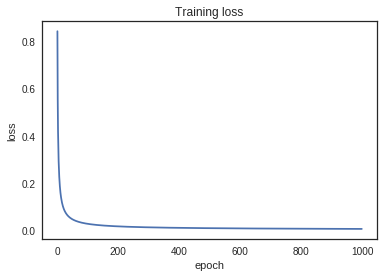

In [ ]:
plot(losses)
title('Training loss')
xlabel('epoch')
ylabel('loss')

## 4. Plot the decision boundary

Here we predict on the traning points and on a fixed grid so that we can use contour to display the decision boundary. 

In [ ]:
def plot_decision_boundary(predict, X, y):
    x1 = np.linspace(X[:,0].min(), X[:, 0].max(), 200)
    x2 = np.linspace(X[:,1].min(), X[:, 1].max(), 200)
    X1, X2 = np.meshgrid(x1, x2)
    pts = np.c_[X1.ravel(), X2.ravel()]
    #f = predict(pts, w, b).reshape(X1.shape)
    f = predict(pts).reshape(X1.shape)
    figure(figsize=(7,7))
    scatter(X[:,0], X[:,1], c=y, cmap=cm.Accent, s=50)
    contour(X1, X2, f, 1, levels=[0.5, 0.51])
    xlabel('$x_1$', fontsize=16)
    ylabel('$x_2$', fontsize=16)
    title('Logistic regression decision boundary')
    

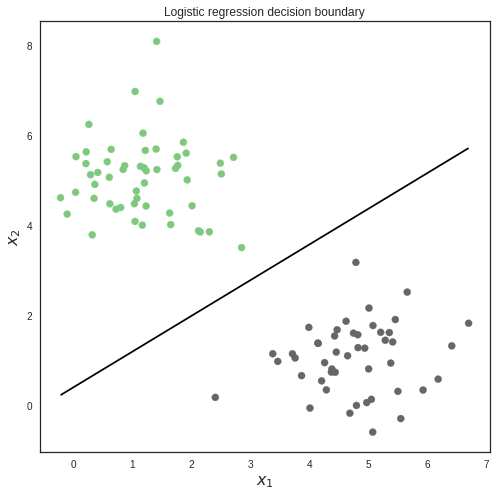

In [ ]:
plot_decision_boundary(lambda X: predict(X, w, b), X, y)
tight_layout()

In [ ]:
print('Estimated parameters,  w =', w, ' b =', b)

Estimated parameters,  w = [ 1.75098391 -2.20772945]  b = 0.9265792816088788


## Comparison with scikit-learn's implementation

Scikit-learn also includes an implementation of [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). This implementation uses a more sophisticated optimization technique than simple gradient descent. Let's compare the decision boundary found by gradient descent to the scikit-learn one. 

In [ ]:
from sklearn.linear_model import LogisticRegression

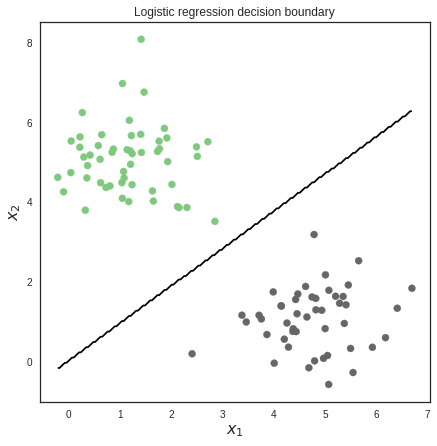

In [ ]:
clf = LogisticRegression()
clf.fit(X, y)
plot_decision_boundary(clf.predict, X, y)

The decision boundary looks similar. Let's compare the fit parameters and the loss.

In [ ]:
w_sklearn, b_sklearn = clf.coef_[0], clf.intercept_[0]
print('Sklearn parameters:', w_sklearn, b_sklearn)

Sklearn parameters: [ 1.40070391 -1.49478246] 0.019496696698994398


In [ ]:
print('Gradient descent loss:', loss(X, y, w, b))

Gradient descent loss: 0.004855350868110301


In [ ]:
print('Sklearn loss:', loss(X, y, w_sklearn, b_sklearn))

Sklearn loss: 0.01351391496917018


Interesting: the scikit-learn model has a higher loss than gradient descent! What's going on here?

Well, it turns out that by default scikit-learn uses a small amount of *regularization* which encourages smaller parameters at the cost of a slightly larger data loss. This is used to discourage *overfitting*. It is possible to reduce the regularization by passing a `C` parameter with a value larger than one to the `LogisticRegression` constructor. Let's try that.

[ 1.91769772 -2.09092895] -0.016163382381173225
Gradient descent loss: 0.004855350868110301
Sklearn loss: 0.004609415025449293


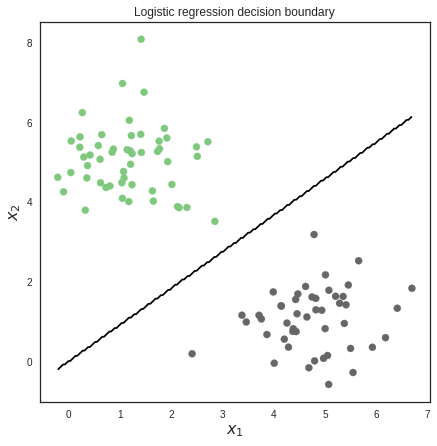

In [ ]:
clf = LogisticRegression(C=5)
clf.fit(X, y)
plot_decision_boundary(clf.predict, X, y)
w_sklearn, b_sklearn = clf.coef_[0], clf.intercept_[0]

In [ ]:
print(w_sklearn, b_sklearn)
print('Gradient descent loss:', loss(X, y, w, b))
print('Sklearn loss:', loss(X, y, w_sklearn, b_sklearn))

[ 1.91769772 -2.09092895] -0.016163382381173225
Gradient descent loss: 0.004855350868110301
Sklearn loss: 0.004609415025449293


Decreasing the regularization strength results in a more similar decision boundary and loss to the gradient descent solution.